# データの読み込み

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd

In [2]:
#CSVデータの読み込み
df=pd.read_csv('housing.csv')
df.head(3)

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,y
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7


In [3]:
import seaborn as sns

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


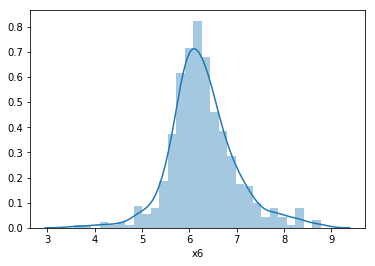

In [5]:
sns.distplot(df['x6'])

# 外れ値除去(3σ法)

In [6]:
col='x6'

In [7]:
mean=df.mean()
mean

x1       3.613524
x2      11.363636
x3      11.136779
x4       0.069170
x5       0.554695
x6       6.284634
x7      68.574901
x8       3.795043
x9       9.549407
x10    408.237154
x11     18.455534
x12    356.674032
x13     12.653063
y       22.532806
dtype: float64

In [8]:
mean[col]

6.284634387351788

In [9]:
#標準偏差(standard deviation) 略std
sigma=df.std()

In [10]:
sigma[col]

0.7026171434153234

In [11]:
low=mean[col]-3*sigma[col]
low

4.176782957105817

In [12]:
high=mean[col]+3*sigma[col]
high

8.392485817597759

In [15]:
df2=df[(df[col]>low)&(df[col]<high)]

In [16]:
len(df)

506

In [17]:
len(df2)

498

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


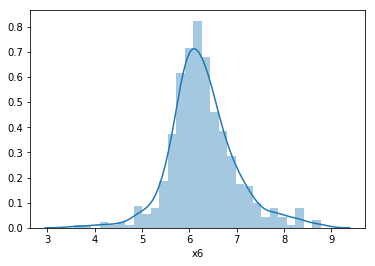

In [21]:
#分布の確認
sns.distplot(df['x6'])

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


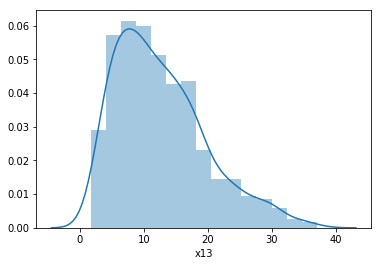

In [58]:
sns.distplot(df2['x13'])

In [26]:
cols=df.columns
cols

Index(['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11',
       'x12', 'x13', 'y'],
      dtype='object')

In [27]:
_df=df
for col in cols:
    #3σ法の上下限値を設定
    low=mean[col]-3*sigma[col]
    high=mean[col]+3*sigma[col]
    #条件での絞り込み
    _df=_df[(_df[col]>low)&(_df[col]<high)]

In [29]:
#オリジナル
len(df)

506

In [30]:
#3σ法適用後
len(_df)

415

(データが正規分布でないときの)対処法

- 外れ値は取り除く
- 外れ値を平均もしくは中央値などで埋める
- 主成分分析などを使って、潜在変数に変換した後に3σ法を適用←高度

## 入力変数と出力変数に分割

In [31]:
_df.head(3)

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,y
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7


In [32]:
#df.iloc[行,列]
X=_df.iloc[:,:-1]
y=_df.iloc[:,-1]

## 訓練データと検証データに分割

In [33]:
from sklearn.model_selection import  train_test_split

In [34]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=1)

## 重回帰分析

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
#モデルを宣言
model=LinearRegression()

In [38]:
#モデルの学習
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [39]:
#検証←訓練データ
model.score(X_train,y_train)

0.7972109224535133

In [40]:
#検証←検証データ
model.score(X_test,y_test)

0.6253776004329592

In [41]:
#過学習(オーバーフィッティング)

# スケーリング

In [42]:
from sklearn.preprocessing import StandardScaler

In [43]:
#scaler の宣言
scaler=StandardScaler()

In [44]:
#scalerの学習(平均と標準偏差を計算)
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [45]:
#scaling
X_train2=scaler.transform(X_train)
X_test2=scaler.transform(X_test)

In [47]:
#モデルの宣言
model=LinearRegression()

In [48]:
#モデルの学習
model.fit(X_train2,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [49]:
#検証←訓練データ
model.score(X_train2,y_train)

0.7972109224535133

In [50]:
#検証←検証データ
model.score(X_test2,y_test)

0.6253776004329598

In [53]:
#重みの確認　←今回の本題
model.coef_

array([-0.2 ,  0.21,  0.51, -0.  , -1.21,  3.92, -0.37, -1.86,  1.17,
       -1.53, -1.87,  0.24, -2.76])

In [52]:
np.set_printoptions(precision=2,suppress=True)

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


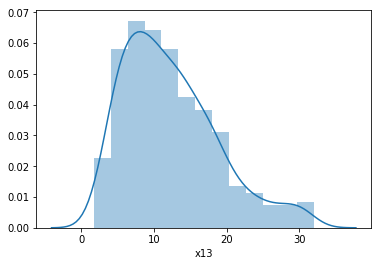

In [57]:
sns.distplot(_df['x13'])